# 1º Problema do Negócio

Desenvolvimento de uma metodologia para previsão do valor do plano de saúde para seus beneficiários.

**Fonte**: https://www.kaggle.com/datasets/mirichoi0218/insurance

## Informações sobre a base de dados

Columns

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

# 2º Análise Exploratória

## **Importação dos Pacotes**

Utilizaremos a linguagem de programação python e alguns dos muitos pacotes utilizados para análise de dados: "Numpy" para operações matemáticas, o pacote "Pandas" para nos auxiliar na manipulação e operações com o dataset, e os pacotes "Matplotlib" e "Seaborn" para gerar os gráficos e visualizações.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Exploração e preparação do dataset**

In [2]:
# Realizando a leitura do arquivo csv:
data = pd.read_csv('Plano_de_Saude.csv')

In [3]:
# Quantidade de linhas e colunas contidas no dataset:
data.shape

(1338, 7)

In [4]:
# Utilizando a função head do pacote pandas para mostrar as primeiras 5 linhas do Dataframe
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Renomeando colunas
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.columns = ['Idade', 'Sexo', 'IMC', 'Dependentes', 'Fumante', 'Região', 'Preço']

Utilizei a função "head" para obter uma prévia das primeiras 5 linhas do dataframe, e mudei os nomes das colunas para facilitar nosso trabalho.

## **Tratando os valores nulos**

####<div align="justify">Um problema muito comum que encontramos ao trabalhar com grandes conjuntos de dados é a existência de valores nulos ou não preenchidos, que podem existir por erros de preenchimento, erros na importação e transformação dos dados, não existência da informação, ou qualquer outro motivo.

####<div align="justify">O tratamento que iremos dar para os valores nulos depende do nosso objetivo com a análise de dados, podemos deixar os valores nulos caso eles não impactem negativamente na nossa análise, podemos apagar a linha inteira que possuí um valor nulo, podemos preencher os valores nulos com um valor específico, existem inúmeras formas de tratar valores nulos, mas sempre devemos manter em mente o nosso objetivo com a análise de dados para decidir qual tratativa utilizar.

####<div align="justify">Para o nosso trabalho iremos substituir os valores nulos pela média correspondente de cada coluna.

In [7]:
# Visualizando a quantidade de valores nulos em cada coluna
data.isnull().sum()

Idade          0
Sexo           0
IMC            0
Dependentes    0
Fumante        0
Região         0
Preço          0
dtype: int64

### Verificando quantidade de linhas e colunas, quantidade de valores não-nulos por coluna, tipos de dados, entre outras informações da base de dados usando o método .info()



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Idade        1338 non-null   int64  
 1   Sexo         1338 non-null   object 
 2   IMC          1338 non-null   float64
 3   Dependentes  1338 non-null   int64  
 4   Fumante      1338 non-null   object 
 5   Região       1338 non-null   object 
 6   Preço        1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Descrição estatística das colunas númericas da base de dados:
data.describe()

,Idade,IMC,Dependentes,Preço
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# Descrição das colunas categóricas da base de dados:
data.describe(include=['O'])

,Sexo,Fumante,Região
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [11]:
# Categorias da coluna "Região"

data['Região'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# 2º Visualização dos dados por meio diversos tipos de gráficos

In [12]:
import matplotlib.style as style
#style.available
style.use('fivethirtyeight')

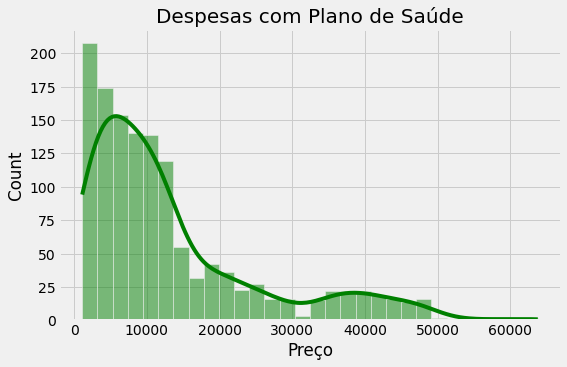

In [13]:
# Histogramas (contagem de frequência) dos preços dos planos de saúde:

plt.figure(figsize=(8,5))
sns.histplot(data['Preço'], kde=True, color='green')
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

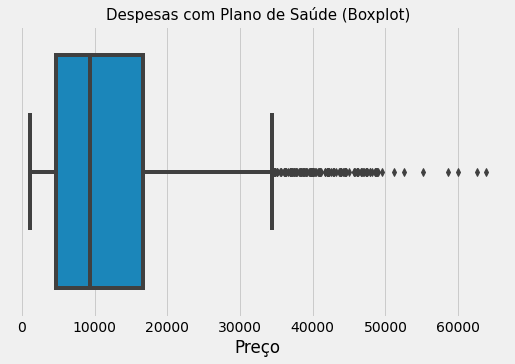

In [14]:
# Boxplot dos preços dos planos de saúde:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Preço'])
plt.title('Despesas com Plano de Saúde (Boxplot)', fontsize=15)
plt.show()

## AGE

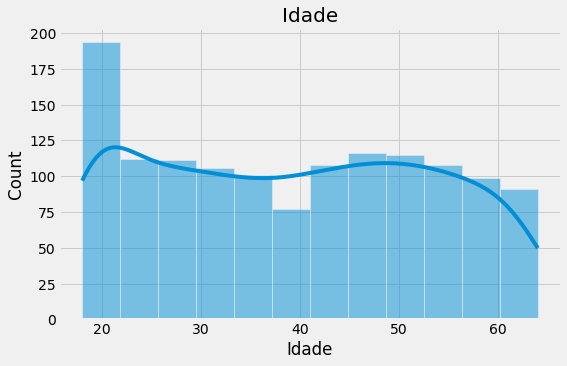

In [15]:
# Histograma da idades dos titulares dos planos de saúde 
plt.figure(figsize=(8,5))
sns.histplot(data['Idade'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

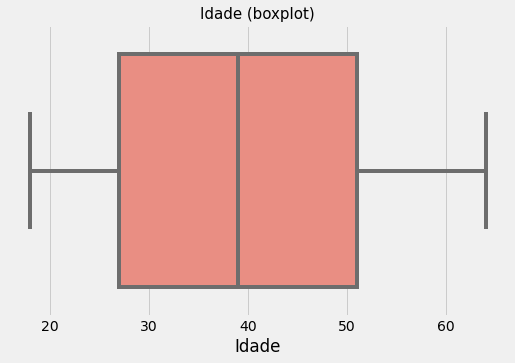

In [16]:
# Boxplot das idades dos beneficiários
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Idade'], color='salmon')
plt.title('Idade (boxplot)', fontsize=15)
plt.show()

# Índice de Massa Corporal

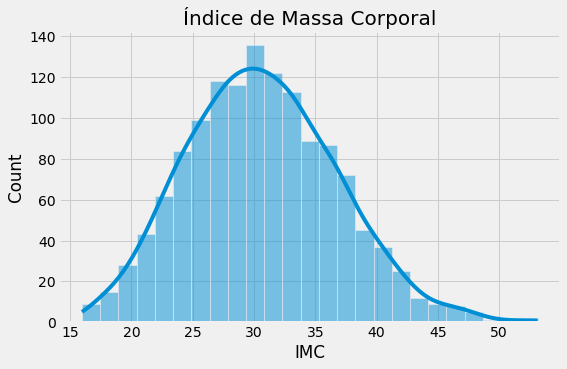

In [17]:
# Histogram of Body Mass Index
plt.figure(figsize=(8,5))
sns.histplot(data['IMC'], kde=True)
plt.title('Índice de Massa Corporal', fontsize=20)
plt.show()

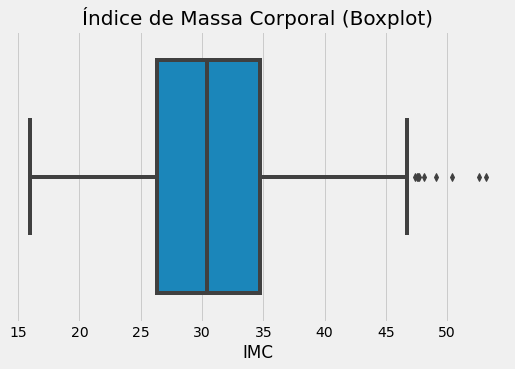

In [18]:
# Boxplot of Body Mass Index
plt.figure(figsize=(8,5))
sns.boxplot(x=data['IMC'])
plt.title('Índice de Massa Corporal (Boxplot)', fontsize=20)
plt.show()

## Dependentes

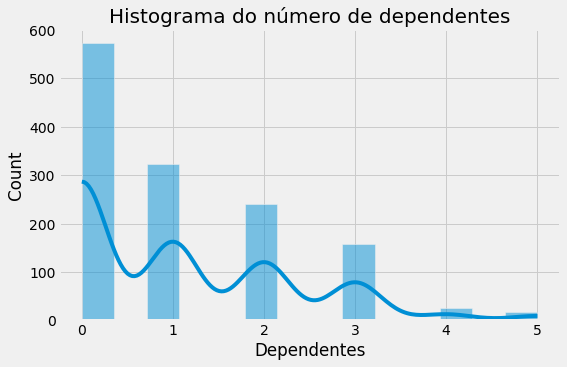

In [19]:
# Histograma dos do número de dependentes de cada cliente
plt.figure(figsize=(8,5))
sns.histplot(x=data['Dependentes'], kde=True)
plt.title('Histograma do número de dependentes', fontsize=20)
plt.show()

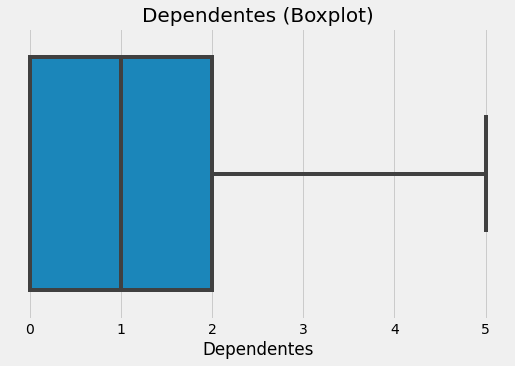

In [20]:
# Boxplot do número de dependentes
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Dependentes'])
plt.title('Dependentes (Boxplot)', fontsize=20)
plt.show()

## Sex

In [21]:
# Value Counts:
print(f'Male    : {data["Sexo"].value_counts()[0]}')
print(f'Female  : {data["Sexo"].value_counts()[1]}')

Male    : 676
Female  : 662


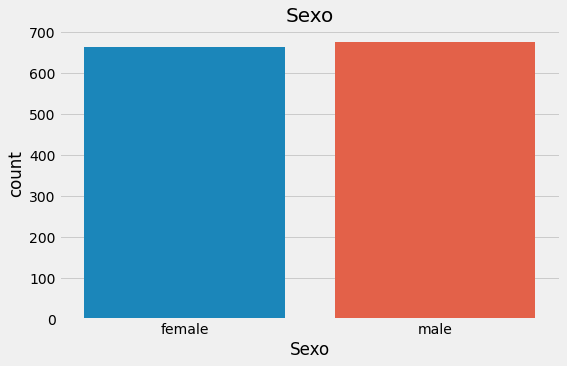

In [22]:
# Histograma é usado para variável QUANTITATIVA
# Countplot é usado para variável QUALITATIVA (ou Categórica)

# Visualization
plt.figure(figsize=(8,5))
sns.countplot(x=data['Sexo'])
plt.title('Sexo', fontsize=20)
plt.show()

# Região

In [23]:
# Quantidade de ocorrências em cada região:
print(f'South-East region  : {data["Região"].value_counts()[0]}')
print(f'North-West region  : {data["Região"].value_counts()[1]}')
print(f'South_West region  : {data["Região"].value_counts()[2]}')
print(f'North-West region  : {data["Região"].value_counts()[3]}')

South-East region  : 364
North-West region  : 325
South_West region  : 325
North-West region  : 324


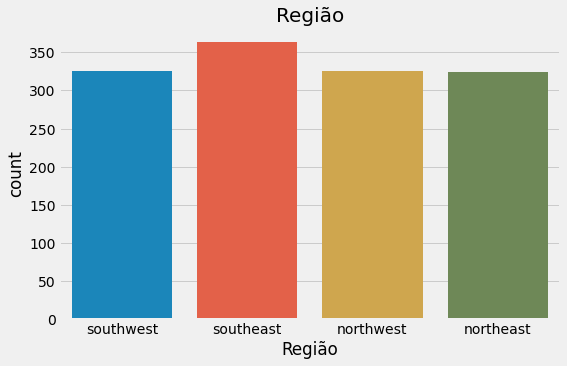

In [24]:
# Visualization
plt.figure(figsize=(8,5))
sns.countplot(x=data['Região'])
plt.title('Região', fontsize=20)
plt.show()

# 3º Pré-Processamento dos Dados

In [25]:
data.head()

,Idade,Sexo,IMC,Dependentes,Fumante,Região,Preço
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
# Arrendondando a coluna 'Idade'
data['Idade'] = round(data['Idade'])

In [27]:
# One-Hot Encoding: Transformar variáveis categóricas em númericas
data = pd.get_dummies(data, drop_first=True)

In [28]:
# Visualizando as duas primeiras linhas, depois de criar as variáveis dummies
data.head(2)

,Idade,IMC,Dependentes,Preço,Sexo_male,Fumante_yes,Região_northwest,Região_southeast,Região_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0


In [29]:
# Rearranjando as colunas para facilitar a visualização e deixar a variável dependente (Preço) mais à direita:

data.columns = ['Idade', 'IMC', 'Dependentes', 'Preço', 'Sexo_m', 'Fumante',
       'Região_northwest', 'Região_southeast', 'Região_southwest']

In [30]:
# Rearranging columns to see better

data = data[['Idade', 'IMC', 'Dependentes', 'Sexo_m', 'Fumante',
       'Região_northwest', 'Região_southeast', 'Região_southwest', 'Preço']]

In [31]:
# Confirmando se os procedimentos foram corretos
data.head(2)

,Idade,IMC,Dependentes,Sexo_m,Fumante,Região_northwest,Região_southeast,Região_southwest,Preço
0,19,27.90,0,0,1,0,0,1,16884.9240
1,18,33.77,1,1,0,0,1,0,1725.5523


In [32]:
# Dividingo entre atributos (features) independentes e dependentes:

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [33]:
# Observando as primeiras duas linhas do subdataset de variáveis independentes:
X.head(2)

,Idade,IMC,Dependentes,Sexo_m,Fumante,Região_northwest,Região_southeast,Região_southwest
0,19,27.90,0,0,1,0,0,1
1,18,33.77,1,1,0,0,1,0


In [34]:
# Observando as primeiras duas linhas do subdataset de variáveis dependentes:
y.head(2)

0    16884.9240
1     1725.5523
Name: Preço, dtype: float64

In [35]:
# Train-Test Split:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# 4º e 5º Construção e Avaliação da Máquina Preditiva

## Vamos criar a metodologia de previsão do valor do custo do plano de saúde que é a própria máquina preditiva.

In [36]:
# Importing métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score

## Máquina Preditiva com Regressão Linear

In [37]:
# Algoritmo de Regressão Linear

from sklearn.linear_model import LinearRegression     
LinearRegression = LinearRegression()    
LinearRegression = LinearRegression.fit(X_train,y_train)   

# Previsões:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))     
print(mean_squared_error(y_test, y_pred))

0.7999876970680433
31827950.229523838


## Máquina Preditiva com Regressão Ridge

In [38]:
# Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Predictions
y_pred = Ridge.predict(X_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))                       

0.7996229763640421
31885988.22140966


## Máquina Preditiva com Regressão Lasso

In [39]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Predictions
y_pred = Lasso.predict(X_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7999368131503515
31836047.38542894


## Máquina Preditiva com Random Forest

In [40]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Predictions
y_pred = RandomForestRegressor.predict(X_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8741514041652518
20026282.31347589


## Salvamento da Máquina Preditiva para Deploy ou implementação

In [41]:
# Creating a pickle file for the classifier
import pickle
filename = 'Preço_Plano_de_Saude.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))